# create figures for med4 DE Axenic 

In [9]:
library(DESeq2)
library(RColorBrewer)
library(reshape2)
library("gplots")
library("GGally")                      # Load GGally package
library(goseq)
library(readxl)
library(tidyverse)
library("pheatmap")
library(corrplot)
library(circlize)

In [10]:
library(ggrepel)

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [12]:
hpath_fname = file.path('..', 'genomes', 'MED4', 'MED4_protein_list.csv')
hpath_df = read.csv(hpath_fname)


In [13]:
df_all_orig = read_csv(file.path('DE_results', 'MED4_all_FC_results.csv'))



Rows: 24377 Columns: 11
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (4): contrast, gene_id, Assay, contrast1
dbl (5): logFC, AveExpr, pvalue, padj, Length
lgl (2): down, up

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
df_all_orig %>% count(contrast1)

contrast1,n
<chr>,<int>
C1vsP1_rna,1855
C2vsC1_prot,1424
C2vsC1_rna,1855
C3vsC1_prot,1424
C3vsC1_rna,1855
C4vsC1_prot,1424
C4vsC1_rna,1855
C5vsC1_prot,1424
C5vsC1_rna,1855


In [15]:
df_all_orig = df_all_orig %>%
    filter(contrast1 %in% c('P2vsP1_prot', 'P2vsP1_rna'))

In [16]:
df_degenes = df_all_orig %>% 
    filter(padj < 0.05)

In [17]:
df_degenes2 = df_all_orig %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>1.5)

In [18]:
names(hpath_df); names(df_all_orig)

[1] "Name"               "gene"               "locus_tag"         
 [4] "old_locus_tag"      "source"             "start"             
 [7] "end"                "strand"             "Note"              
[10] "exception"          "inference"          "product"           
[13] "protein_id"         "gene_length"        "path_id"           
[16] "main"               "sub"                "path"              
[19] "ecpath"             "Category"           "Membrane.transport"
[22] "kegg_gene1"         "kegg_gene2"

[1] "contrast"  "gene_id"   "logFC"     "AveExpr"   "pvalue"    "padj"     
 [7] "Assay"     "contrast1" "Length"    "down"      "up"

In [19]:
df_all = left_join(df_all_orig, hpath_df, by=c('gene_id'='locus_tag'))

In [20]:
df_all %>% count(Category) %>% arrange(desc(n)) 

Category,n
<chr>,<int>
Other,804
Uncharacterized,594
Genetic Info,545
Metabolism,355
AA/Nucleotide,320
Energy/Carbohydrate/Glycan,189
Membrane transport,161
Photosynthesis/Carbon fixation,134
AA/Nucleotide;Energy/Carbohydrate/Glycan,72


In [21]:
unique(df_all$contrast1)

[1] "P2vsP1_prot" "P2vsP1_rna"

In [22]:
t(head(df_all))

contrast,P2 - P1,P2 - P1,P2 - P1,P2 - P1,P2 - P1,P2 - P1
gene_id,TX50_RS03580,TX50_RS01970,TX50_RS02240,TX50_RS03595,TX50_RS02910,TX50_RS02580
logFC,-3.181408,2.092055,-4.850771,-3.239873,-3.810674,-2.550317
AveExpr,1.950864,3.111139,2.015664,2.727578,1.984790,2.136807
pvalue,1.754211e-09,4.466944e-09,6.454797e-09,8.638927e-09,2.335060e-08,3.929054e-08
padj,2.497996e-06,3.063877e-06,3.063877e-06,3.075458e-06,6.650251e-06,9.324955e-06
Assay,Proteome,Proteome,Proteome,Proteome,Proteome,Proteome
contrast1,P2vsP1_prot,P2vsP1_prot,P2vsP1_prot,P2vsP1_prot,P2vsP1_prot,P2vsP1_prot
Length,903,1491,171,1215,1578,1107
down,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
up,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE


In [23]:
# number of differentiall expressed genes
df_all %>%
    filter(padj < 0.05) %>% count(Assay, down)

Assay,down,n
<chr>,<lgl>,<int>
Proteome,FALSE,97
Proteome,TRUE,149
RNA,FALSE,553
RNA,TRUE,574


# Top up and down regulated genes

In [60]:
df_all %>%
    filter(padj < 0.05, Category=='Metabolism') %>% top_n(-20, logFC) %>% 
    select(Assay,logFC,gene, product, Category, path) #%>% 
    #select(Assay,logFC,gene)

Assay,logFC,gene,product,Category,path
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Proteome,-3.239873,ispG,(E)-4-hydroxy-3-methylbut-2-enyl-diphosphate synthase,Metabolism,00900 Terpenoid backbone biosynthesis [PATH:ko00900]
Proteome,-3.810674,(chlB),ferredoxin:protochlorophyllide reductase (ATP-dependent) subunit B,Metabolism,00860 Porphyrin metabolism [PATH:ko00860]
Proteome,-3.162316,bioB,biotin synthase BioB,Metabolism,00780 Biotin metabolism [PATH:ko00780]
Proteome,-2.608668,"(chlH,bchH)",magnesium chelatase subunit H,Metabolism,00860 Porphyrin metabolism [PATH:ko00860]
RNA,-3.015567,bcp,thioredoxin-dependent thiol peroxidase,Metabolism,99980 Enzymes with EC numbers
RNA,-2.542559,fabD,ACP S-malonyltransferase,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];00333 Prodigiosin biosynthesis [PATH:ko00333];01004 Lipid biosynthesis proteins [BR:ko01004]
RNA,-2.713881,chlG,chlorophyll synthase ChlG,Metabolism,00860 Porphyrin metabolism [PATH:ko00860];01006 Prenyltransferases [BR:ko01006]
RNA,-5.374876,fabG,3-oxoacyl-[acyl-carrier-protein] reductase,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061];00333 Prodigiosin biosynthesis [PATH:ko00333];00780 Biotin metabolism [PATH:ko00780];01004 Lipid biosynthesis proteins [BR:ko01004]
RNA,-2.466551,bchL,ferredoxin:protochlorophyllide reductase (ATP-dependent) iron-sulfur ATP-binding protein,Metabolism,00860 Porphyrin metabolism [PATH:ko00860]


In [25]:
get_top_gene_id <- function(df_all, assay, top_number) {
    df_all %>%
        filter(padj < 0.05) %>% 
        filter(Assay == assay) %>% 
        top_n(top_number, logFC) %>% 
        select(gene_id, Assay)
}
number_of_top_ids = 5
top_up_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', number_of_top_ids), get_top_gene_id(df_all, 'RNA', number_of_top_ids)))
top_down_de_genes = bind_rows(list(get_top_gene_id(df_all, 'Proteome', -number_of_top_ids), get_top_gene_id(df_all, 'RNA', -number_of_top_ids)))


In [26]:
dput(names(df_all))

c("contrast", "gene_id", "logFC", "AveExpr", "pvalue", "padj", 
"Assay", "contrast1", "Length", "down", "up", "Name", "gene", 
"old_locus_tag", "source", "start", "end", "strand", "Note", 
"exception", "inference", "product", "protein_id", "gene_length", 
"path_id", "main", "sub", "path", "ecpath", "Category", "Membrane.transport", 
"kegg_gene1", "kegg_gene2")


In [27]:
df_pivot_for_top = df_all %>%
    pivot_wider(
        names_from = 'Assay',
        values_from = c("logFC", #"AveExpr", "pvalue",
                        "padj", ),
        id_cols=c("gene_id",  "gene",  "product",  "sub", 
                  #"module",
                  "path"
                  #"pathway",
                 # "ecpath"
                 )
    ) %>% select(gene_id, gene, product, sub, path, logFC_Proteome, padj_Proteome,logFC_RNA,padj_RNA)


In [28]:
dput(names(df_pivot_for_top))

c("gene_id", "gene", "product", "sub", "path", "logFC_Proteome", 
"padj_Proteome", "logFC_RNA", "padj_RNA")


In [29]:
df_pivot_for_top %>% filter(gene_id %in% top_up_de_genes$gene_id) %>% arrange(desc(logFC_RNA), desc(logFC_Proteome) )

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS07555,,high light inducible protein,,,NA,NA,9.582754,1.692376e-25
TX50_RS09275,,high light inducible protein,,,NA,NA,7.724628,6.064172e-27
TX50_RS01930,,hypothetical protein,,,NA,NA,6.716442,4.883855e-09
TX50_RS01990,(tatA),TatA/E family twin arginine-targeting protein translocase,"09123 Folding, sorting and degradation;09131 Membrane transport;09183 Protein families: signaling and cellular processes",02044 Secretion system [BR:ko02044];03060 Protein export [PATH:ko03060];03070 Bacterial secretion system [PATH:ko03070],NA,NA,6.418917,1.423354e-05
TX50_RS01780,(manB),hypothetical protein,09101 Carbohydrate metabolism;09107 Glycan biosynthesis and metabolism,00051 Fructose and mannose metabolism [PATH:ko00051];00520 Amino sugar and nucleotide sugar metabolism [PATH:ko00520];00541 O-Antigen nucleotide sugar biosynthesis [PATH:ko00541],NA,NA,6.278731,1.867978e-08
TX50_RS05100,,DUF1830 domain-containing protein,,,2.506502,8.161950e-05,5.739883,1.517956e-06
TX50_RS06110,,high light inducible protein,,,3.578723,9.485699e-05,5.227949,1.053895e-20
TX50_RS05595,,hypothetical protein,,,3.756483,4.454277e-04,4.367388,5.521605e-06
TX50_RS04910,glnA,type I glutamate--ammonia ligase,09101 Carbohydrate metabolism;09102 Energy metabolism;09105 Amino acid metabolism;09132 Signal transduction;09143 Cell growth and death;09183 Protein families: signaling and cellular processes,"00220 Arginine biosynthesis [PATH:ko00220];00250 Alanine, aspartate and glutamate metabolism [PATH:ko00250];00630 Glyoxylate and dicarboxylate metabolism [PATH:ko00630];00910 Nitrogen metabolism [PATH:ko00910];02020 Two-component system [PATH:ko02020];04147 Exosome [BR:ko04147];04217 Necroptosis [PATH:ko04217]",2.120484,8.884468e-05,3.356977,7.395966e-06


In [30]:
df_pivot_for_top %>% filter(gene_id %in% top_down_de_genes$gene_id)%>% arrange(logFC_RNA, logFC_Proteome) 

gene_id,gene,product,sub,path,logFC_Proteome,padj_Proteome,logFC_RNA,padj_RNA
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TX50_RS09815,,hypothetical protein,,,-1.6483558,9.617590e-03,-7.318974,4.369788e-29
TX50_RS07370,,hypothetical protein,,,NA,NA,-6.624597,6.691965e-06
TX50_RS09750,,hypothetical protein,,,NA,NA,-6.546076,7.442791e-09
TX50_RS01170,sat,sulfate adenylyltransferase,09102 Energy metabolism;09104 Nucleotide metabolism;09106 Metabolism of other amino acids;09110 Biosynthesis of other secondary metabolites,00230 Purine metabolism [PATH:ko00230];00261 Monobactam biosynthesis [PATH:ko00261];00450 Selenocompound metabolism [PATH:ko00450];00920 Sulfur metabolism [PATH:ko00920],-0.3768282,2.323220e-01,-6.411948,4.894692e-29
TX50_RS02515,psaJ,photosystem I reaction center subunit IX,09102 Energy metabolism;09181 Protein families: metabolism,00194 Photosynthesis proteins [BR:ko00194];00195 Photosynthesis [PATH:ko00195],1.4614388,6.179798e-02,-6.036345,5.749359e-21
TX50_RS02910,(chlB),ferredoxin:protochlorophyllide reductase (ATP-dependent) subunit B,09108 Metabolism of cofactors and vitamins,00860 Porphyrin metabolism [PATH:ko00860],-3.8106737,6.650251e-06,-3.587949,6.113291e-14
TX50_RS09615,,hypothetical protein,,,-3.4346310,1.341340e-04,-3.184830,9.271594e-13
TX50_RS08820,,DUF561 domain-containing protein,,,-3.8517803,8.161950e-05,-2.886786,1.322310e-10
TX50_RS02240,,DUF4278 domain-containing protein,,,-4.8507713,3.063877e-06,0.121172,8.205385e-01


# Vulcano plot

In [31]:
df_degenes2 = df_all %>% 
    filter(padj < 0.05) %>%
    filter (abs(logFC)>2)

In [32]:
df_degenes = df_all %>% 
    filter(padj < 0.05) 

In [33]:
df_degenes2 %>% count(Assay, Category) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )

Category,Proteome,RNA
<chr>,<int>,<int>
Other,9,78
Metabolism,5,28
Uncharacterized,4,115
Genetic Info,3,61
Energy/Carbohydrate/Glycan,3,18
Nitrogen metabolism,2,5
Membrane transport,1,11
high light inducible,1,8
Photosynthesis/Carbon fixation,NA,46


In [34]:
# these are all pseudo genes
df_all %>% filter(is.na(Category)) #%>% count(product)

contrast,gene_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,Length,down,⋯,gene_length,path_id,main,sub,path,ecpath,Category,Membrane.transport,kegg_gene1,kegg_gene2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
P2vsP1,TX50_RS03060,-1.60270267,2215.30477,3.881598e-06,1.301601e-05,RNA,P2vsP1_rna,347,TRUE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
P2vsP1,TX50_RS03640,0.03276479,96.18116,9.662668e-01,9.746921e-01,RNA,P2vsP1_rna,260,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
P2vsP1,TX50_RS07310,1.26042539,20.23375,9.589235e-03,1.738460e-02,RNA,P2vsP1_rna,266,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [35]:
df_all = df_all %>% filter(!is.na(Category)) #%>% count(product)


In [36]:
category_move_to_other = c('Env. Info/Cellular Process', 'Genetic Info')
category_move_to_metabolism = c('Energy/Carbohydrate/Glycan')
category_move_to_aa = c('AA/Nucleotide;Energy/Carbohydrate/Glycan')
df_all = df_all %>%
    mutate(Category2 = Category) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_other, 'Other', Category2)) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_metabolism, 'Metabolism', Category2)) %>%
    mutate(Category2 = if_else(Category %in% category_move_to_aa, 'AA/Nucleotide', Category2)) 

In [37]:
df_all %>% count(Assay, Category2) %>% pivot_wider(names_from=Assay, values_from = n) %>% arrange(desc(Proteome), desc(RNA) )


Category2,Proteome,RNA
<chr>,<int>,<int>
Other,644,776
Metabolism,264,280
AA/Nucleotide,195,197
Uncharacterized,175,419
Membrane transport,72,89
Photosynthesis/Carbon fixation,62,72
high light inducible,6,13
Nitrogen metabolism,6,6


In [38]:
df_degenes%>% count(gene) %>% arrange()

gene,n
<chr>,<int>
,657
(acpT),1
(adk),1
"(afuA,fbpA)",1
"(afuB,fbpB)",1
(apt),1
(argG),1
(aroE),1
"(aroF,aroG,aroH)",2


In [39]:
names(df_all)

[1] "contrast"           "gene_id"            "logFC"             
 [4] "AveExpr"            "pvalue"             "padj"              
 [7] "Assay"              "contrast1"          "Length"            
[10] "down"               "up"                 "Name"              
[13] "gene"               "old_locus_tag"      "source"            
[16] "start"              "end"                "strand"            
[19] "Note"               "exception"          "inference"         
[22] "product"            "protein_id"         "gene_length"       
[25] "path_id"            "main"               "sub"               
[28] "path"               "ecpath"             "Category"          
[31] "Membrane.transport" "kegg_gene1"         "kegg_gene2"        
[34] "Category2"

In [40]:
df_all$log.padj = -log10(df_all$padj)

In [41]:
dput(unique(df_all$Category2))

c("Membrane transport", "Nitrogen metabolism", "Other", "Metabolism", 
"Uncharacterized", "high light inducible", "Photosynthesis/Carbon fixation", 
"AA/Nucleotide")


In [42]:
cat_order = c(
    "Nitrogen metabolism", 
    "Photosynthesis/Carbon fixation", 
    "AA/Nucleotide", 
    "Membrane transport", 
    "Uncharacterized", 
    "high light inducible",
    "Metabolism", 
    "Other"
)


my.cols <- c(
  "Nitrogen metabolism" = "#1b9e77",         # Teal green
  "Photosynthesis/Carbon fixation" = "#66a61e",            # Olive green
  "AA/Nucleotide" = "#7570b3",              # Purple
  "Membrane transport" = "#e7298a",         # Pink
  "Uncharacterized" = "#d95f02",  # Orange
  "high light inducible" = "#e6ab02",       # Mustard yellow
  #"Metabolism" = "#c0c0c0",                 # Brown
  "Metabolism" = "#a6761d",                 # Brown
  "Other" = "#b0b0b0"                       # Gray
)

df_all$Category2 = factor(df_all$Category2, levels = cat_order)

#my.cols <- c(brewer.pal(length(unique(df_all$Category2))-1, "Set3"), 'grey34')

In [43]:
options(repr.plot.width = 4, repr.plot.height = 3, repr.plot.res = 300)

In [44]:
colSums(is.na(df_all))

contrast            gene_id              logFC            AveExpr 
                 0                  0                  0                  0 
            pvalue               padj              Assay          contrast1 
                 4                  4                  0                  0 
            Length               down                 up               Name 
                 0                  0                  4                  0 
              gene      old_locus_tag             source              start 
                 0                  0                  0                  0 
               end             strand               Note          exception 
                 0                  0                  0                  0 
         inference            product         protein_id        gene_length 
                 0                  0                  0                  0 
           path_id               main                sub               path 
                 0                  0                  0                  0 
            ecpath           Category Membrane.transport         kegg_gene1 
                 0                  0                  0                  0 
        kegg_gene2          Category2           log.padj 
                 0                  0                  4

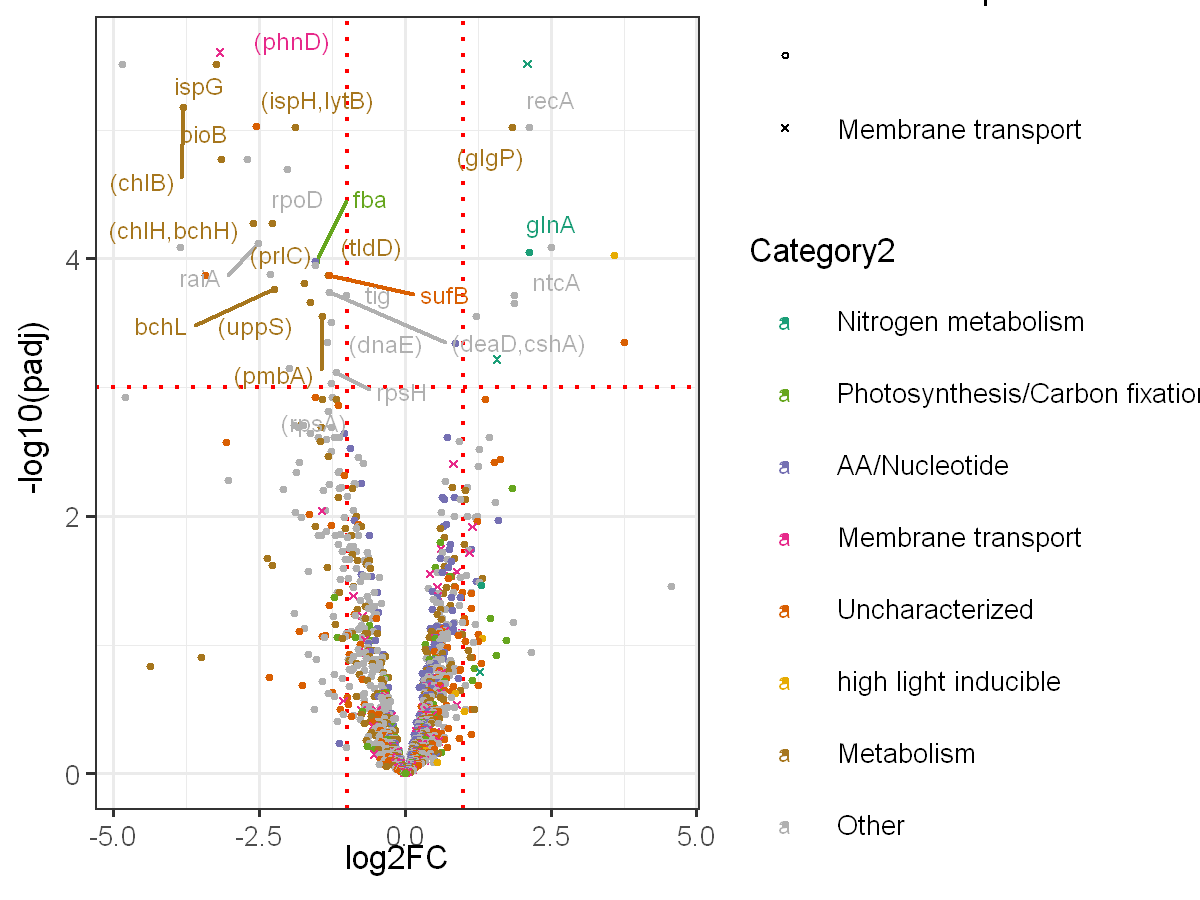

In [46]:
library(ggrepel)
assay = 'Proteome'

df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 1, log.padj > 3, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category2, fill=Category2, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    geom_point(size=0.5, stroke=0.5 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    scale_fill_manual(values = my.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=2)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [47]:
ggsave('figures/MED4_Axenic_DE_Proteome.svg', height = 3, width = 4)

Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."


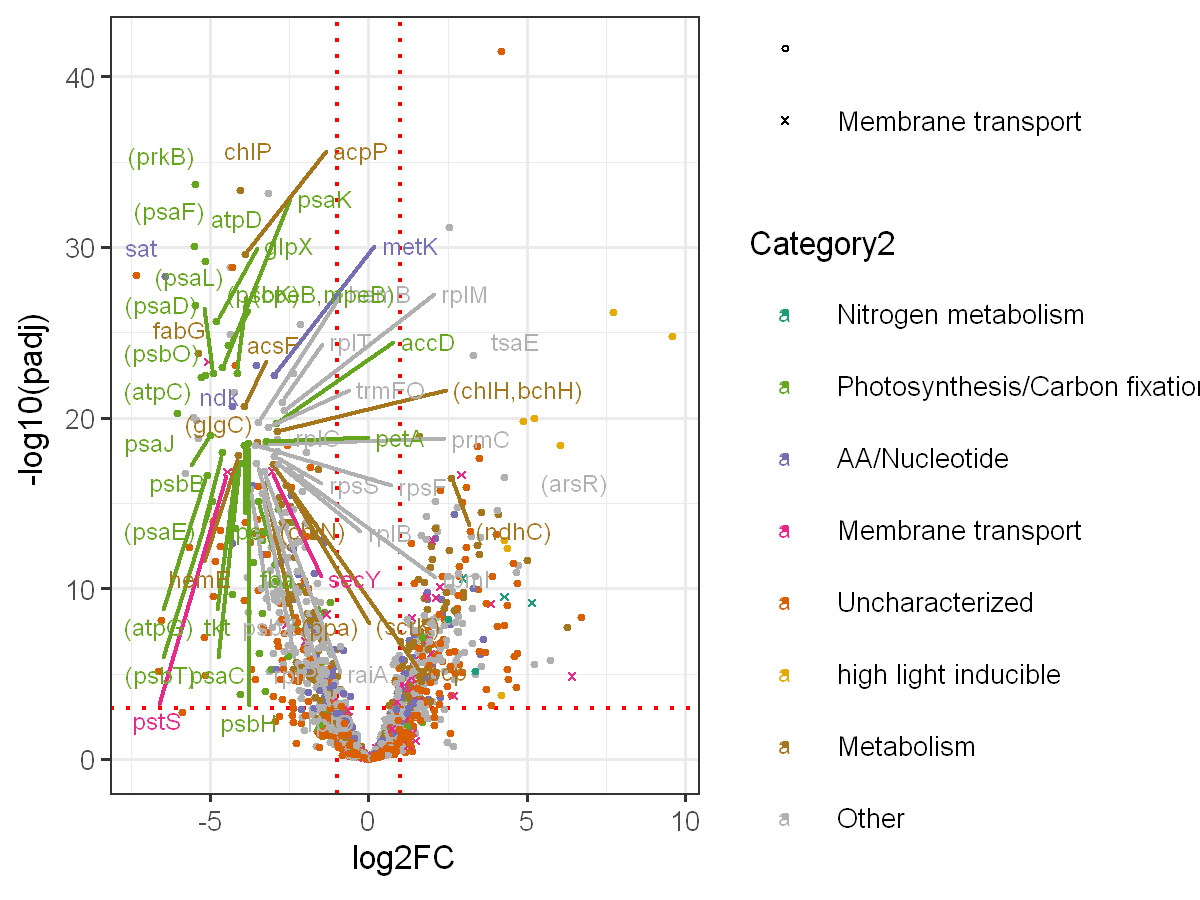

In [53]:
library(ggrepel)
assay = 'RNA'


# ymax <- 15
# df_all$capped.log.padj <- pmin(df_all$log.padj, ymax)
# xmax <- 5
# df_all$capped.logFC <- pmin(df_all$logFC, xmax)


df_labels = df_all %>%
  filter(Assay == assay, abs(logFC) > 2.5, log.padj > 15, !is.na(gene), gene != '')

# Use ggplot2 allows more flexibility in plotting
df_all %>% filter(Assay == assay) %>%
ggplot(aes(x = logFC, y =log.padj, color=Category2, fill=Category2, shape=Membrane.transport 
          )) + 
    geom_vline(xintercept = c(-1,1), colour = "red", linetype="dotted" ) + # Add fold change cutoffs
    geom_hline(yintercept = 3, colour = "red", linetype="dotted" ) + # Add significance cutoffs
    geom_point(size=0.5, stroke=0.5 )+
    theme_bw(base_size = 8) + # change theme
    #theme_bw() + # change theme
    xlab(expression("log2FC")) + # x-axis label
    ylab(expression(" -log10(padj)")) + # y-axis label
    #geom_vline(xintercept = 0, colour = "black") + # Add 0 lines
    scale_colour_manual(values = my.cols)+
    scale_fill_manual(values = my.cols)+
    scale_shape_manual(values = c(21,4)) +
    geom_text_repel(data=df_labels,
                    aes( logFC, log.padj ,label=gene), max.overlaps = Inf, size=2)  #+ # add gene label
    #facet_wrap(~contrast, ncol=2)

In [54]:
ggsave('figures/MED4_Axenic_DE_RNA.svg', height = 3, width = 4)


Warning message:
"Removed 4 rows containing missing values (`geom_point()`)."


In [ ]:
df_all$kegg_gene

In [ ]:
help(ggsave)